# FASE 4 : VISUALIZACIONES

En este notebook se presentan las principales visualizaciones del proyecto, orientadas a analizar la rotación de empleados y los factores 
asociados al riesgo de abandono en la empresa.

In [1]:
# --- Librería necesarias ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("df_hr_clean.csv", index_col = 0)

 ## 📊 Visualizaciones para contextualización
  
  En esta sección se presentan las visualizaciones iniciales que permiten comprender la estructura general de la empresa y el comportamiento global de la rotación. Estos gráficos proporcionan una visión descriptiva del conjunto de empleados, sirviendo como base para interpretar posteriormente los análisis más específicos sobre factores asociados al abandono.

🏢 **ESTRUCTURA DE LA EMPRESA**

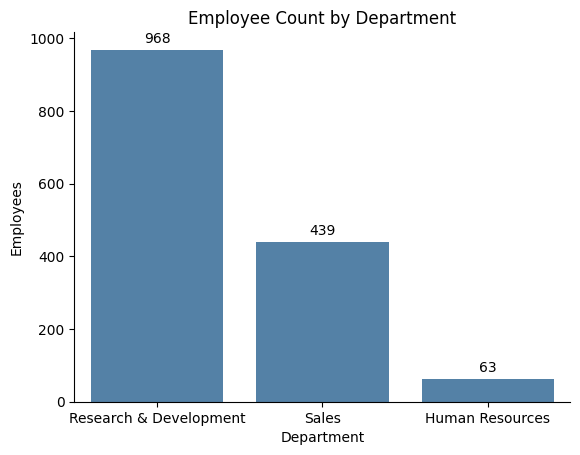

In [3]:
# NÚMERO DE EMPLEADOS POR DEPARTAMENTO:

ax = sns.countplot(x = "Department", 
              data = df, 
              color = 'steelblue' , order = ['Research & Development','Sales', 'Human Resources' ])
ax.set_title('Employee Count by Department')
ax.set_xlabel('Department')
ax.set_ylabel('Employees')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.show()


⬆️ Interpretación: La mayor parte de la plantilla se concentra en Research & Development, seguido de Sales, mientras que Human Resources cuenta con un número considerablemente inferior de empleados.

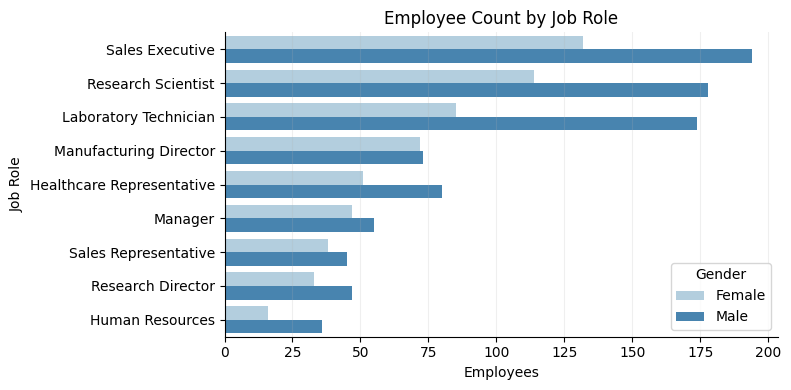

In [4]:
# NÚMERO DE EMPLEADOS POR PUESTO DE TRABAJO (TENIENDO EN CUENTA EL GÉNERO):

order_roles = df["JobRole"].value_counts().index

plt.figure(figsize=(8,4))
sns.countplot(y = "JobRole", 
              data = df, 
              palette= 'Blues',
              order=order_roles,
              hue = 'Gender',
                            )
plt.title('Employee Count by Job Role')
plt.xlabel('Employees')
plt.ylabel('Job Role')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False) 
plt.grid(axis="x", alpha=0.2)
plt.tight_layout()
plt.show()


⬆️ Interpretación: La mayor concentración de empleados se encuentra en los puestos de Sales Executive, Research Scientist y Laboratory Technician. Además, se aprecia una predominancia masculina en la mayoría de los roles, lo que aporta contexto sobre la estructura demográfica de la empresa.

 ## 📊 Visualizaciones de Factores Clave de Rotación

En este apartado se presentan las visualizaciones orientadas a identificar y analizar los factores asociados a la rotación de empleados. A través del cruce de variables y el estudio de patrones, se exploran aquellas condiciones laborales y características individuales que muestran una mayor relación con el abandono.

🔁**ROTACIÓN Y A QUIÉN AFECTA**

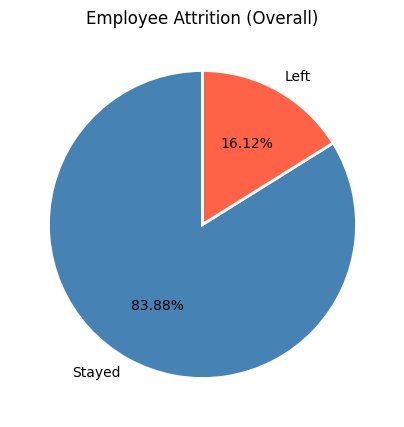

In [5]:
# ROTACIÓN GLOBAL EN LA EMPRESA:

df_attrition_global =  (df['Attrition'].value_counts(normalize = True) *100).reset_index()

labels_map = {0: "Stayed", 1: "Left"}
labels = df_attrition_global["Attrition"].map(labels_map)

plt.figure(figsize=(5,5))

plt.pie(
    df_attrition_global["proportion"],
    labels=labels,
    colors=['steelblue','tomato'],
    autopct="%.2f%%",
    startangle=90, wedgeprops={"edgecolor": "white", "linewidth": 2})


plt.title("Employee Attrition (Overall)")

plt.show()


⬆️ Interpretación: Este gráfico muestra la tasa de rotación global de la empresa. El 16,12% de los empleados ha abandonado la organización, mientras que el 83,88% permanece en ella. Esta visión general permite dimensionar el fenómeno de la rotación y sirve como punto de partida para el análisis de los factores asociados al abandono.

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\4118578798.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\4118578798.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


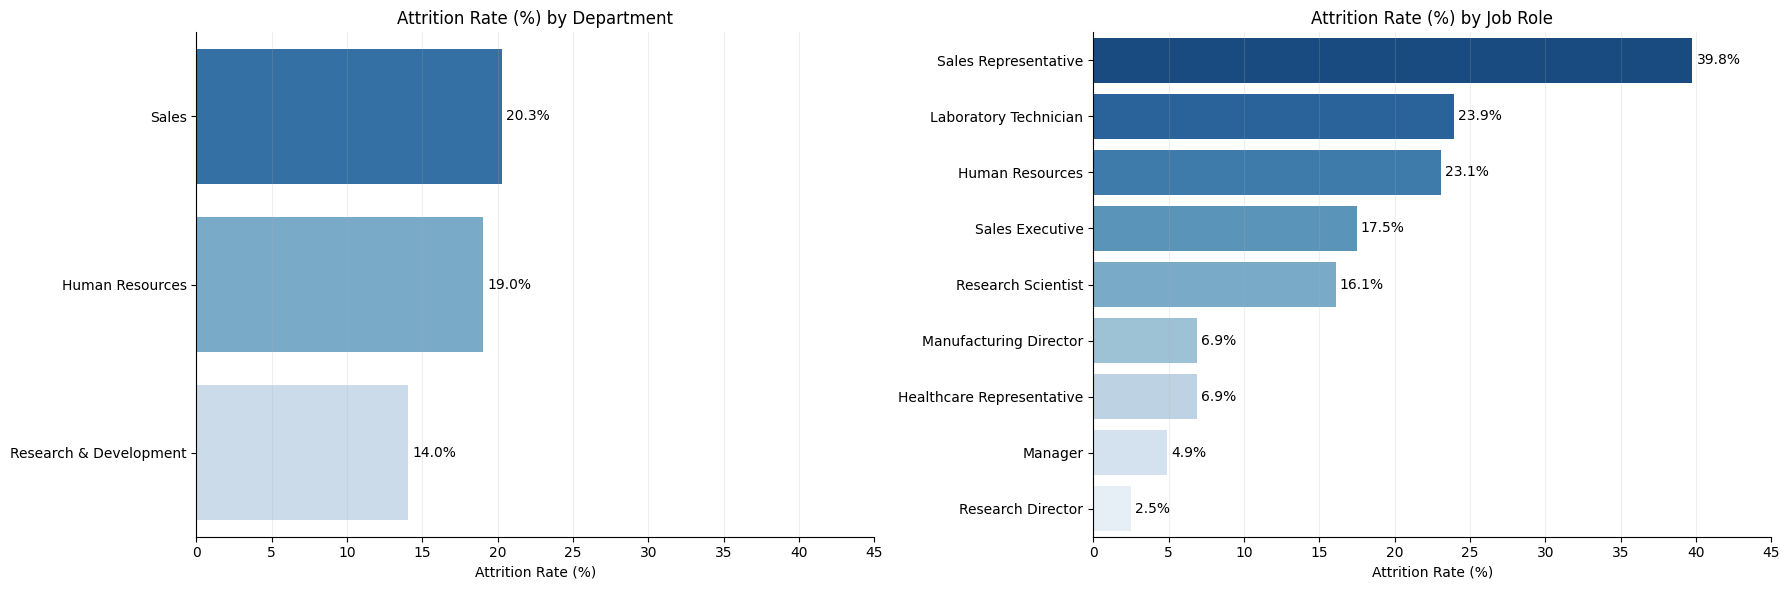

In [6]:
# TASA DE ROTACIÓN POR DEPARTAMENTO Y POR PUESTO DE TRABAJO:

# Vamos a crear un SUBPLOT en el que representar los dos gráficos anteriores ("Attrition Rate (%) by Department" y "Attrition Rate (%) by Job Role" )
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Trasladamos el primero de los gráficos al SUBPLOT:
attrition_by_dept = (
    df.groupby("Department")["Attrition"]
      .mean()
      .mul(100)
      .reset_index()
      .sort_values("Attrition", ascending=False)
)

sns.barplot(
    data=attrition_by_dept,
    y="Department",
    x="Attrition",
    palette = 'Blues_r',
    ax = ax1
)

ax1.set_title("Attrition Rate (%) by Department")
ax1.set_xlabel("Attrition Rate (%)")
ax1.set_ylabel("")

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.grid(axis="x", alpha=0.2)
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f%%", padding=3)

# Es el momento de trasladar el segundo de los gráficos al SUBPLOT:
attrition_by_role = (
    df.groupby("JobRole")["Attrition"]
      .mean()
      .mul(100)
      .reset_index()
      .sort_values("Attrition", ascending=False)
)

sns.barplot(
    data=attrition_by_role,
    y ="JobRole",
    x="Attrition",
    palette='Blues_r',
    ax=ax2
)

ax2.set_title("Attrition Rate (%) by Job Role")
ax2.set_xlabel("Attrition Rate (%)")
ax2.set_ylabel("")

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.grid(axis="x", alpha=0.2)
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", padding=3)


ax1.set_xlim(0, 45)
ax2.set_xlim(0, 45)
plt.tight_layout()
plt.show();


⬆️ Interpretación: El análisis por puesto de trabajo revela que los Sales Representative presentan la mayor tasa de rotación (39.8%), seguidos de Laboratory Technician (23.9%) y Human Resources (23.1%). En contraste, los puestos directivos como Manager (4.9%) y Research Director (2.5%) muestran tasas significativamente más bajas. A nivel departamental, Sales lidera la rotación con un 20.3%, seguido de Human Resources (19.0%) y Research & Development (14.0%). Estos datos sugieren que los roles orientados a ventas y las posiciones de entrada o nivel medio presentan mayor riesgo de abandono, mientras que los puestos con mayor responsabilidad o especialización técnica tienden a retener mejor el talento.

👤**PERFIL DEL EMPLEADO QUE SE VA**

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\3717361864.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\3717361864.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


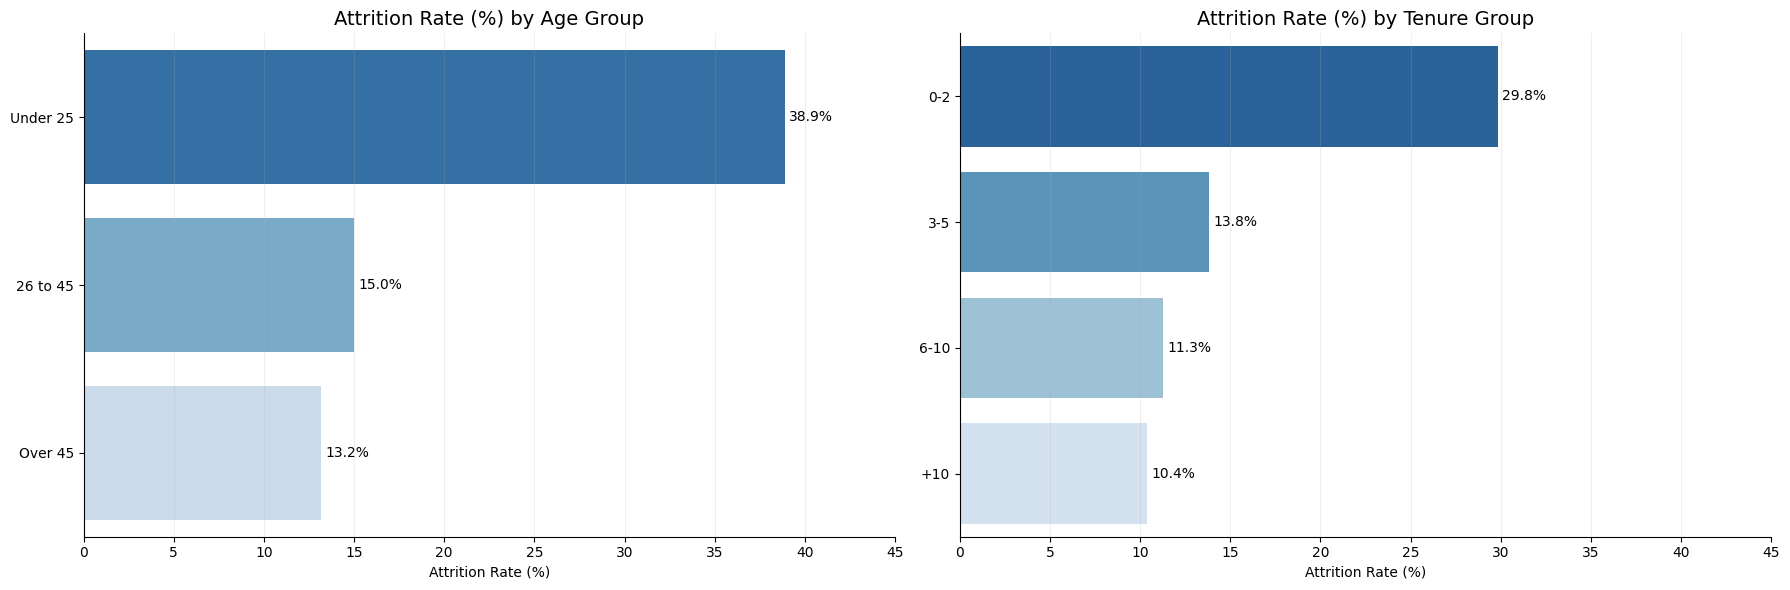

In [7]:
# TASA DE ROTACIÓN POR GRUPO DE EDAD Y POR GRUPO DE ANTIGÜEDAD:

# Vamos a crear un SUBPLOT en el que representar los dos gráficos anteriores ("Attrition Rate (%) by Age Group" y "Attrition Rate (%) by Tenure Group" )
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Trasladamos el primero de los gráficos al SUBPLOT:
attrition_by_age = (
    df.groupby("AgeGroup")["Attrition"]
      .mean()
      .mul(100)
      .reset_index()
      .sort_values("Attrition", ascending=False)
)
age_group_translation = {
    "Menores 25": "Under 25",
    "Entre 26 y 45": "26 to 45",
    "A partir de 45": "Over 45"
}
attrition_by_age["AgeGroup"] = attrition_by_age["AgeGroup"].replace(age_group_translation)

sns.barplot(
    data=attrition_by_age,
    y="AgeGroup",
    x="Attrition",
    palette='Blues_r',
    ax = ax1
)

ax1.set_title("Attrition Rate (%) by Age Group", fontsize=14)
ax1.set_xlabel("Attrition Rate (%)")
ax1.set_ylabel("")

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.grid(axis="x", alpha=0.2)
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f%%", padding=3)

# Es el momento de trasladar el segundo de los gráficos al SUBPLOT:
attrition_by_tenure = (
    df.groupby("TenureGroup")["Attrition"]
      .mean()
      .mul(100)
      .reset_index()
      .sort_values("Attrition", ascending=False)
)
sns.barplot(
    data=attrition_by_tenure,
    y="TenureGroup",
    x="Attrition",
    palette='Blues_r',
    ax = ax2
)

ax2.set_title("Attrition Rate (%) by Tenure Group", fontsize=14)
ax2.set_xlabel("Attrition Rate (%)")
ax2.set_ylabel("")

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.grid(axis="x", alpha=0.2)
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", padding=3)

ax1.set_xlim(0, 45)
ax2.set_xlim(0, 45)
plt.tight_layout()
plt.show();


⬆️ Interpretación: Los empleados menores de 25 años presentan una tasa de rotación del 38.9%, significativamente superior a los grupos de mayor edad (≈15%). Por antigüedad, los empleados con menos de 2 años muestran una rotación del 29.8%, que disminuye progresivamente con la permanencia. Ambos gráficos confirman que la rotación temprana, tanto por edad como por antigüedad, es el principal factor de riesgo.

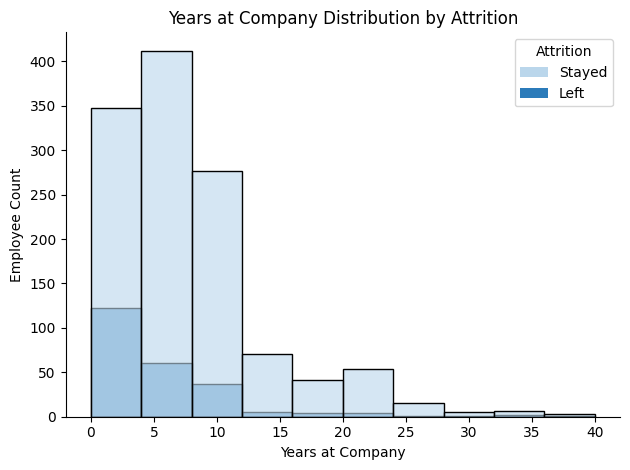

In [8]:
# DISTRIBUCIÓN DE LOS AÑOS DE PERMANENCIA EN LA EMPRESA Y TASA DE ROTACIÓN:

# Colores contrastados dentro de Blues
palette = [sns.color_palette("Blues")[1], sns.color_palette("Blues")[4]]

# Histograma
ax = sns.histplot(
    data=df,
    x="YearsAtCompany",
    hue="Attrition",
    bins=10,
    palette=palette,
    alpha=0.6
)
plt.title("Years at Company Distribution by Attrition")
plt.xlabel("Years at Company")
plt.ylabel("Employee Count")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


# Leyenda manual
legend_elements = [
    Patch(facecolor=palette[0], label="Stayed"),
    Patch(facecolor=palette[1], label="Left"),
    ]
ax.legend(handles=legend_elements, title="Attrition")

plt.tight_layout()
plt.show()


⬆️ Interpretación: La distribución de empleados por antigüedad muestra una concentración significativa en los primeros 10 años, donde también se concentra la mayor parte de la rotación.

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\308150562.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(["YearsBin", "Attrition"]).size().unstack(fill_value=0)


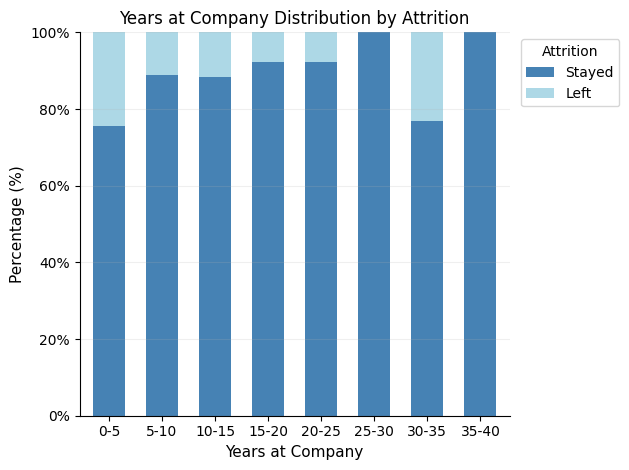

In [9]:
# DISTRIBUCIÓN DE LOS AÑOS EN LA EMPRESA POR ROTACIÓN (% APILADOS):

import matplotlib.ticker as mtick

# Crear bins de años
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40"]
df["YearsBin"] = pd.cut(df["YearsAtCompany"], bins=bins, labels=labels, right=False)

# Calcular porcentajes apilados
pivot = df.groupby(["YearsBin", "Attrition"]).size().unstack(fill_value=0)
pivot.columns = ["Stayed", "Left"]
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# --- Gráfico ---
fig, ax = plt.subplots()

pivot_pct["Stayed"].plot(kind="bar", ax=ax, color="steelblue", label="Stayed", width=0.6)
pivot_pct["Left"].plot(kind="bar", ax=ax, color="lightblue", label="Left", width=0.6,
                       bottom=pivot_pct["Stayed"])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Years at Company Distribution by Attrition")
ax.set_xlabel("Years at Company", fontsize=11)
ax.set_ylabel("Percentage (%)", fontsize=11)
ax.set_xticklabels(labels, rotation=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", alpha=0.2)
ax.legend(title="Attrition", bbox_to_anchor=(1.01, 1), loc="upper left")

plt.tight_layout()
plt.show()

⬆️ Interpretación: Destaca el tramo 0-5 años como el de mayor rotación, confirmando el patrón de abandono temprano. El tramo 30-35 años muestra una tasa similar, sin embargo este dato debe interpretarse con cautela ya que solo cuenta con 13 empleados, lo que lo hace estadísticamente poco representativo

💪🏻 **CONDICIONES DE TRABAJO Y SATISFACCIÓN**

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\459219822.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


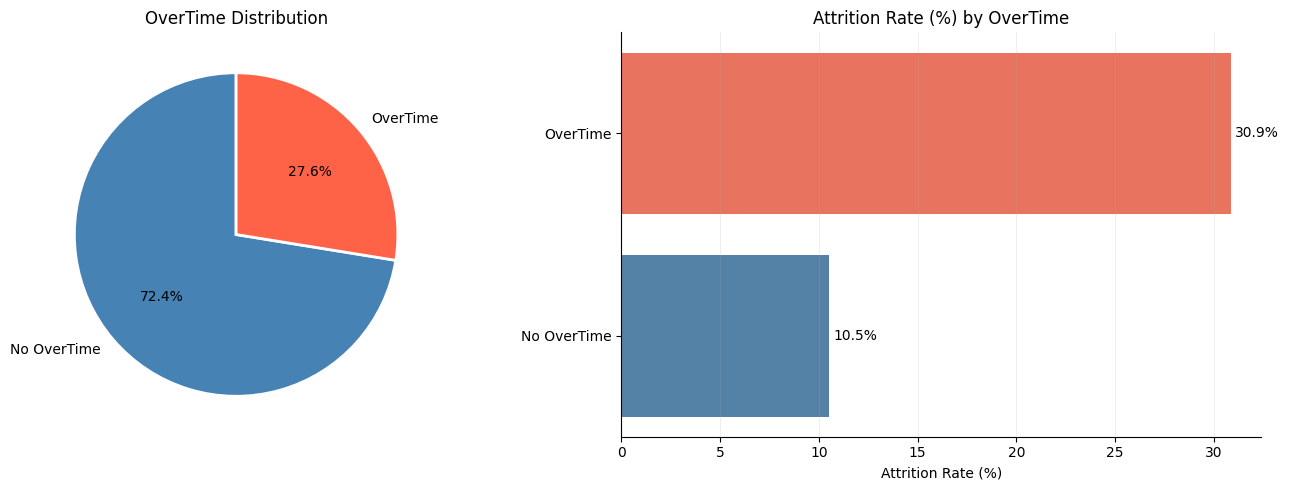

In [10]:
# HORAS EXTRA GLOBALES Y HORAS EXTRA vs TASA DE ROTACIÓN:

# Vamos a crear un SUBPLOT en el que representar dos gráficas.
attrition_by_overtime = (
    df.groupby("OverTime")["Attrition"]
      .mean()
      .mul(100)
      .reset_index()
      .sort_values("Attrition", ascending=False)
)

# Traducción de etiquetas
overtime_translation = {1: "OverTime", 0: "No OverTime"}
attrition_by_overtime["OverTime"] = attrition_by_overtime["OverTime"].replace(overtime_translation)

# Datos para el pie chart
overtime_counts = df["OverTime"].value_counts()
overtime_counts.index = overtime_counts.index.map({1: "OverTime", 0: "No OverTime"})

# --- SUBPLOT ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
sns.barplot(
    data=attrition_by_overtime,
    y="OverTime",
    x="Attrition",
    palette = ['tomato', 'steelblue'],
    legend=False,
    ax=ax2
)
ax2.set_title("Attrition Rate (%) by OverTime")
ax2.set_xlabel("Attrition Rate (%)")
ax2.set_ylabel("")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.grid(axis="x", alpha=0.2)
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", padding=3)

# Pie chart
ax1.pie(
    overtime_counts,
    labels=overtime_counts.index,
    colors= ['steelblue', 'tomato'],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "white", "linewidth": 2}
)
ax1.set_title("OverTime Distribution")

plt.tight_layout()
plt.show()

⬆️ Interpretación: El trabajo en horas extra se asocia con un incremento significativo del riesgo de rotación. Aunque solo el 27,6% de los empleados realiza horas extra (gráfico 1), su tasa de abandono (30,9%) (gráfico 2) es casi tres veces superior a la de quienes no las realizan (10,5%). Esto posiciona el overTime como uno de los factores más críticos en la retención del talento.

In [11]:
# RELACIÓN ENTRE VIAJES, HORAS EXTRA Y TASA DE ROTACIÓN:

travel_overtime_attrition = (
    df.groupby(["BusinessTravel", "OverTime"])
      .agg(
          AttritionRate=("Attrition", "mean"),
          EmployeeCount=("Attrition", "count"),
          AttritionCount=("Attrition", "sum")  
      )
      .reset_index()
)

travel_overtime_attrition["AttritionRate"] = (travel_overtime_attrition["AttritionRate"] * 100).round(2)
travel_overtime_attrition = travel_overtime_attrition[['BusinessTravel', 'OverTime', 'EmployeeCount', 'AttritionRate','AttritionCount']]
travel_overtime_attrition = travel_overtime_attrition.sort_values("AttritionRate", ascending=False)
travel_overtime_attrition


,BusinessTravel,OverTime,EmployeeCount,AttritionRate,AttritionCount
1,Frequently,1,81,43.21,35
5,Rarely,1,290,28.62,83
3,Non-Travel,1,34,20.59,7
0,Frequently,0,182,16.48,30
4,Rarely,0,778,9.90,77
2,Non-Travel,0,105,4.76,5


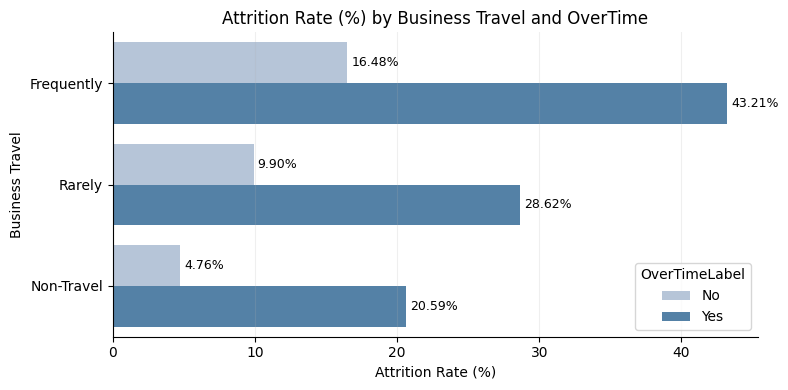

In [12]:

df_plot = travel_overtime_attrition.copy()

# Etiquetas para OverTime
df_plot["OverTimeLabel"] = df_plot["OverTime"].map({0: "No", 1: "Yes"})

# Orden recomendado (de más exigente a menos)
order_bt = ["Frequently", "Rarely", "Non-Travel"]
df_plot["BusinessTravel"] = pd.Categorical(df_plot["BusinessTravel"], categories=order_bt, ordered=True)
df_plot = df_plot.sort_values(["BusinessTravel", "OverTime"], ascending=[True, True])

plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=df_plot,
    y="BusinessTravel",
    x="AttritionRate",
    hue="OverTimeLabel",
    palette=["lightsteelblue", "steelblue"]  # No / Yes (más contraste)
)

ax.set_title("Attrition Rate (%) by Business Travel and OverTime")
ax.set_xlabel("Attrition Rate (%)")
ax.set_ylabel("Business Travel")

# Etiquetas con % 
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", padding=3, fontsize=9)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="x", alpha=0.2)

plt.tight_layout()
plt.show()


⬆️ Interpretación: El gráfico revela un efecto combinado entre viajes de negocios y horas extras sobre la rotación. Los empleados que viajan frecuentemente y realizan horas extras presentan la mayor tasa de rotación (43.21%), mientras que aquellos que no viajan muestran tasas significativamente menores (4.76% sin horas extras, 20.59% con horas extras). La combinación de viajes frecuentes con horas extras parece intensificar el riesgo de abandono. Constata también al OverTime como un factor clave incluso en puestos sin desplazamientos.

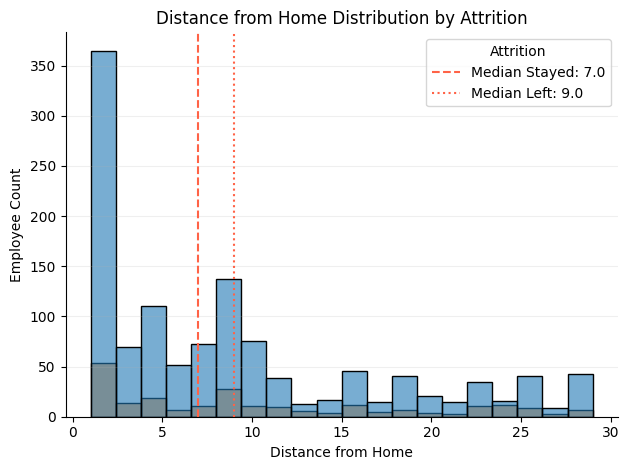

In [13]:
# DISTRIBUCIÓN DE LA DISTANCIA AL TRABAJO TENIENDO EN CUENTA LA ROTACIÓN:

# Calcular mediana por grupo
stayed = df[df["Attrition"] == 0]["DistanceFromHome"]
left = df[df["Attrition"] == 1]["DistanceFromHome"]

fig, ax = plt.subplots()

sns.histplot(
    data=df,
    x="DistanceFromHome",
    hue="Attrition",
    bins=20,
    alpha=0.6,
    color=['steelblue', 'lightblue'],
    ax=ax
)

# Líneas de media y mediana
ax.axvline(stayed.median(), color='tomato', linestyle="--", linewidth=1.5, label=f"Median Stayed: {stayed.median():.1f}")
ax.axvline(left.median(), color="tomato", linestyle=":", linewidth=1.5, label=f"Median Left: {left.median():.1f}")

ax.set_title("Distance from Home Distribution by Attrition")
ax.set_xlabel("Distance from Home")
ax.set_ylabel("Employee Count")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", alpha=0.2)
ax.legend(title="Attrition")

plt.tight_layout()
plt.show()

⬆️ Interpretación: La distribución de la distancia al trabajo muestra que los empleados que abandonan la empresa tienden a vivir algo más lejos que los que permanecen. La mediana de distancia de los empleados que se van (9.0 km) es superior a la de los que se quedan (7.0 km). Aunque ambos grupos se concentran en distancias cortas, esta diferencia de 2 km en la mediana sugiere que la distancia al trabajo puede ser un factor moderado en la decisión de abandono, especialmente cuando se combina con otros factores como las horas extras o la baja satisfacción laboral.

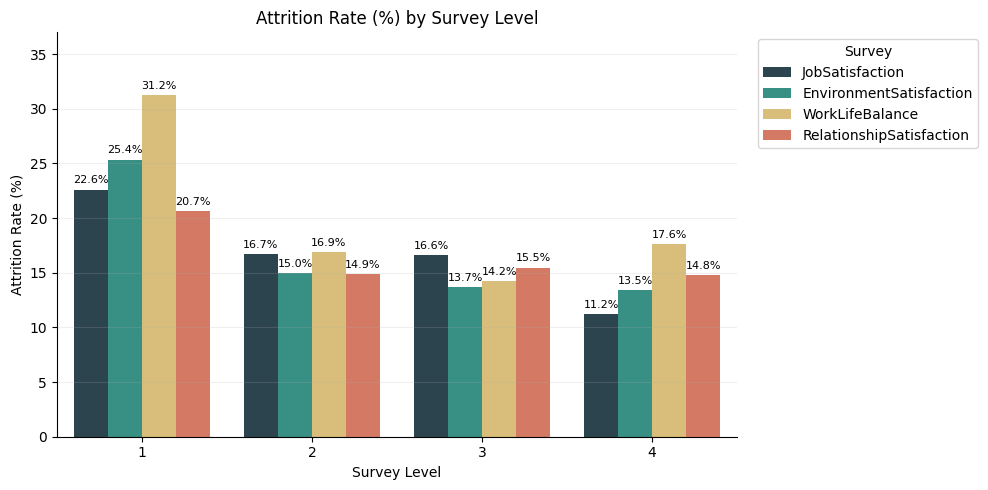

In [14]:
# ENCUESTAS DE SATISFACCIÓN Y TASA DE ROTACIÓN:

surveys = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "WorkLifeBalance",
    "RelationshipSatisfaction"
]

frames = []
for s in surveys:
    tmp = (
        df.groupby(s)["Attrition"]
          .mean()
          .mul(100)
          .reset_index()
          .rename(columns={s: "Level", "Attrition": "AttritionRate"})
    )
    tmp["Survey"] = s
    frames.append(tmp)

survey_attrition = pd.concat(frames, ignore_index=True)

# Asegurar orden correcto de niveles (1–4)
survey_attrition["Level"] = pd.Categorical(survey_attrition["Level"], categories=[1,2,3,4], ordered=True)

palette = ["#264653", "#2A9D8F", "#E9C46A", "#E76F51"]
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=survey_attrition,
    x="Level",
    y="AttritionRate",
    hue="Survey",
    palette= palette
)

plt.title("Attrition Rate (%) by Survey Level")
plt.xlabel("Survey Level")
plt.ylabel("Attrition Rate (%)")
plt.xticks([0,1,2,3], ["1", "2", "3", "4"])
ax.set_ylim(0, 37) 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", alpha=0.2)
# Etiquetas encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=8, padding=3)


plt.legend(title="Survey", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()



*Nota: Se utiliza una paleta de cuatro colores cualitativos para facilitar la distinción entre las encuestas, ya que representan variables independientes sin relación de orden entre sí*

⬆️Interpretación: Los empleados que puntúan con un 1 (menor satisfacción) en las cuatro encuestas presentan tasas de rotación notablemente más altas, especialmente en WorkLifeBalance (31.3%) y EnvironmentSatisfaction (25.4%). A medida que aumenta el nivel de satisfacción, la rotación tiende a disminuir de forma general, siendo JobSatisfaction la variable con la caída más consistente. Destaca el comportamiento atípico de RelationshipSatisfaction, cuya tasa de rotación se mantiene más estable a lo largo de los niveles, sugiriendo que las relaciones interpersonales tienen un impacto menor en la decisión de abandono que otros factores como el equilibrio entre vida laboral y personal.

⛓️‍💥**CARRERA PROFESIONAL Y ESTANCAMIENTO**

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\2231626144.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rates = df.groupby("PromotionGroup")["Attrition"].mean().reset_index()
C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\2231626144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  var = sns.barplot(


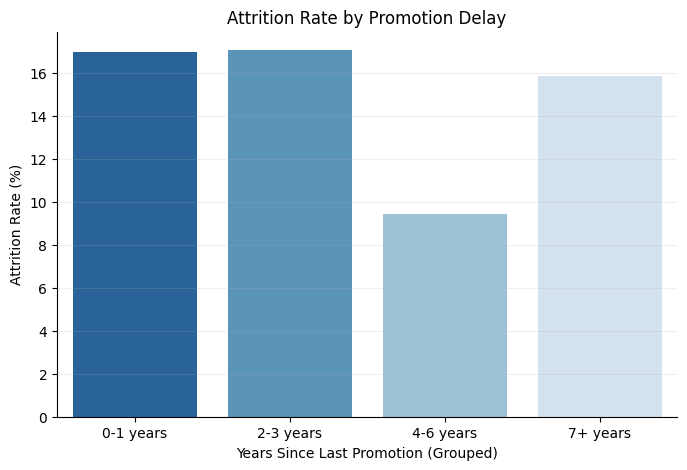

In [15]:
# AÑOS DESDE EL ÚLTIMO ASCENSO Y TASA DE ROTACIÓN:

# Se establecen rangos en los años
df["PromotionGroup"] = pd.cut(
    df["YearsSinceLastPromotion"],
    bins=[-1, 1, 3, 6, 15],
    labels=["0-1 years", "2-3 years", "4-6 years", "7+ years"]
)

attrition_rates = df.groupby("PromotionGroup")["Attrition"].mean().reset_index()
attrition_rates["Attrition"] *= 100

plt.figure(figsize=(8,5))

var = sns.barplot(
    data=attrition_rates,
    x="PromotionGroup",
    y="Attrition",
    palette="Blues_r"
)

plt.title("Attrition Rate by Promotion Delay")
plt.xlabel("Years Since Last Promotion (Grouped)")
plt.ylabel("Attrition Rate (%)")
plt.grid(axis="y", alpha=0.2)
var.spines["top"].set_visible(False)
var.spines["right"].set_visible(False)


⬆️ Interpretación:

Este gráfico muestra una dinámica en “U”:
- Rotación alta al inicio
- Baja en el periodo medio
- Vuelve a subir cuando hay estancamiento prolongado

Una parte importante de la rotación ocurre incluso en los primeros años, posiblemente por:

- Falta de adaptación
- Expectativas no cumplidas
- Rotación temprana típica en algunos puestos

Al haber estancamiento prolongado es más lógico que suba. Lo más preocupante es que incluso habiendo promoción, la tasa de rotación es muy 
alta.


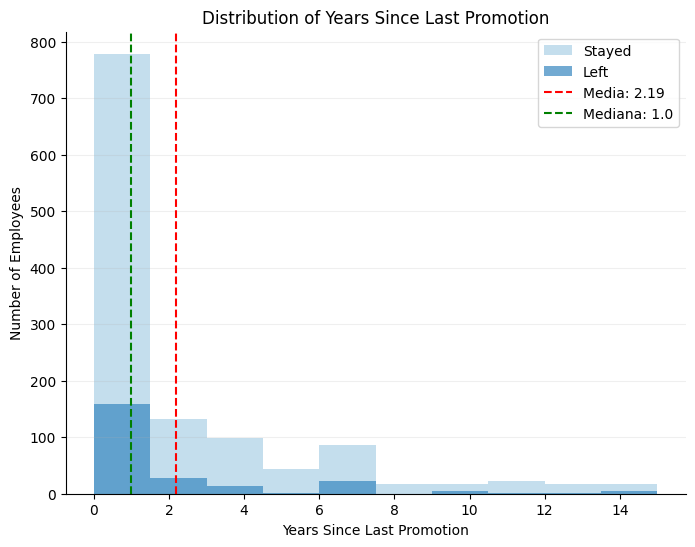

In [16]:
# HISTOGRAMA COMPARATIVO DE AÑOS DESDE ÚLTIMO ASCENSO CON ROTACIÓN:

media = round(df['YearsSinceLastPromotion'].mean(), 2)
mediana = round(df['YearsSinceLastPromotion'].median(), 2)

palette = sns.color_palette("Blues", 2)

stayed = df[df["Attrition"] == 0]["YearsSinceLastPromotion"]
left = df[df["Attrition"] == 1]["YearsSinceLastPromotion"]

plt.figure(figsize=(8,6))

plt.hist(stayed, alpha=0.7, label="Stayed", color=palette[0])
plt.hist(left, alpha=0.7, label="Left", color=palette[1])
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana}')

plt.title("Distribution of Years Since Last Promotion")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Employees")
plt.grid(axis="y", alpha=0.2)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.show()

⬆️ Interpretación: 

El histograma compara empleados que se quedaron (Stayed) con Empleados que se fueron (Left) según los años desde su última promoción (YearsSinceLastPromotion), donde cada barra muestra cuántos empleados hay en un rango concreto de años sin promoción.

Hay muchas barras y altas al principio (0–2 años):
- La mayoría de empleados ha tenido una promoción reciente. Tanto lo que se han quedado como ido.

Si las barras de “Left” aparecen más altas en valores grandes (7+):
- Significa que los empleados que abandonan suelen acumular más años sin promoción. Hay un repunte en los años más grandes, indicando que el estancamiento promueve el que se vayan.

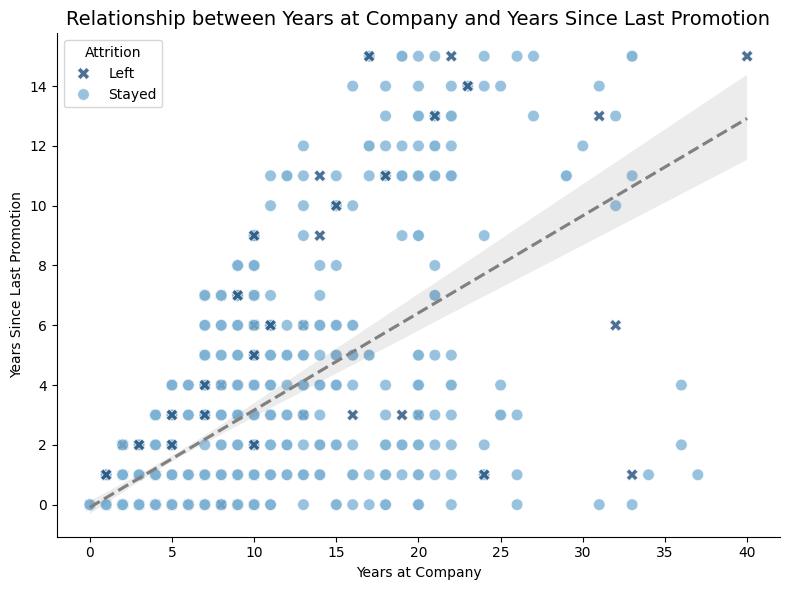

In [17]:
# RELACIÓN ENTRE AÑOS EN LA EMPRESA Y AÑOS DESDE ÚLTIMO ASCENSO (Scatterplot):

# Mapear labels
labels = df["Attrition"].map({0: "Stayed", 1: "Left"})

# Colores azul diferenciados
colors = ["#1f4e79", "#7fb3d5"]  # azul oscuro y azul claro

plt.figure(figsize=(8,6))

# Scatterplot
sns.scatterplot(
    x=df["YearsAtCompany"],
    y=df["YearsSinceLastPromotion"],
    hue = labels,
    style=labels,
    markers={"Stayed": "o", "Left": "X"},
    palette=colors,
    edgecolor="white",
    linewidth=0.5,
    alpha=0.8,
    s=70
)

# Línea de tendencia general
sns.regplot(
    x=df["YearsAtCompany"],
    y=df["YearsSinceLastPromotion"],
    scatter=False,
    color="gray",
    line_kws={"linestyle":"--"}
)

# Títulos y etiquetas
plt.title("Relationship between Years at Company and Years Since Last Promotion", fontsize=14)
plt.xlabel("Years at Company")
plt.ylabel("Years Since Last Promotion")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


⬆️ Interpretación:
Cada punto y cruz es un empleado, comparando su antigüedad en la empresa y los años desde su última promoción. Además, el color separa y representa nivel de rotación (Stayed (.)/Left (x))

Relación entre años en la empresa y años desde última promoción:
- Hay una tendencia positiva (como muestra la línea de regresión) → en general, a más años en la empresa, más tiempo ha pasado desde la última promoción.
- Esto tiene sentido: empleados muy antiguos pueden haber tenido su última promoción hace muchos años.

Distribución de los que se fueron (Left):
- Varios empleados que se fueron están en el rango de 5–20 años en la empresa y con 5–10 años desde su última promoción.
- Algunos outliers: personas que llevaban muchos años en la empresa (más de 30 años) también se fueron.
- Esto sugiere que la falta de promociones recientes puede estar relacionada con la rotación.

Distribución de los que se quedaron (Stayed):
- La mayoría de los empleados que permanecen están más concentrados en menos años desde la última promoción (0–5 años), incluso si llevan muchos años en la empresa.

Esto refuerza la idea de que actualizar/promover a los empleados ayuda a retenerlos.

Conclusión:
- El estancamiento profesional puede estar asociado con mayor riesgo de rotación.

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\1096852102.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  var = sns.barplot(


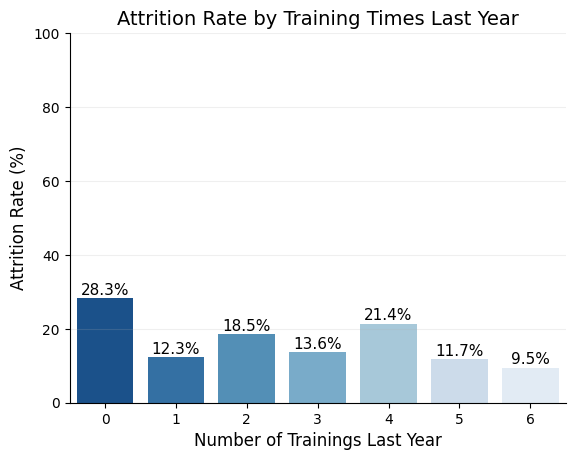

In [19]:
# TASA DE ROTACIÓN RESPECTO DE LAS FORMACIONES RECIBIDAS EN EL ÚLTIMO AÑO:

#  Agrupar y calcular porcentaje de rotación
attrition_TTL = df.groupby('TrainingTimesLastYear')['Attrition'].mean().reset_index()
attrition_TTL['Attrition'] = attrition_TTL['Attrition'] * 100  # convertir a %

#  Barplot

var = sns.barplot(
    data=attrition_TTL,
    x='TrainingTimesLastYear',
    y='Attrition',
    palette='Blues_r'
)

# Agregar valores sobre las barras
for index, row in attrition_TTL.iterrows():
    var.text(
        index, row.Attrition + 1, f"{row.Attrition:.1f}%", 
        color='black', ha="center", fontsize=11
        )

# Personalizar gráfico
plt.title('Attrition Rate by Training Times Last Year', fontsize=14)
plt.xlabel('Number of Trainings Last Year', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.ylim(0, 100)  # para que esté en %
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.2)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

⬆️ Interpretación: El gráfico de barras muestra el número de formaciones que se dieron a lo largo del año, comparado con la tasa de rotación. 
Al analizar la rotación por número de trainings, observamos que los empleados con menos capacitaciones durante el último año presentan un mayor porcentaje de rotación.
Esto indica que ofrecer más oportunidades de formación podría ayudar a mejorar la retención y evitar la rotación laboral.

💶 **SALARIO**

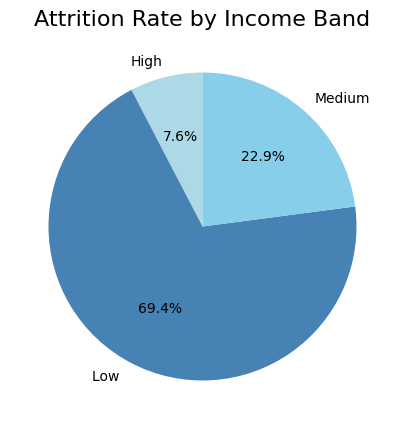

In [20]:
# TASA DE ROTACIÓN EN FUNCIÓN DEL GRUPO SALARIAL (pie chart):

# Traducción y ordenamiento de etiquetas
income_translation = {
    "Bajo": "Low ",
    "Medio": "Medium",
    "Alto": "High"
}
df["IncomeBand"] = df["IncomeBand"].replace(income_translation)

attrition_pct = df.groupby('IncomeBand')['Attrition'].mean() * 100

plt.figure(figsize=(5,5))
plt.pie(
    attrition_pct,
    labels=attrition_pct.index,
    autopct='%1.1f%%',
    colors= ["lightblue","steelblue","skyblue"],
    startangle=90,
    
)
plt.title('Attrition Rate by Income Band', fontsize=16)
plt.show()

⬆️ Interpretación: Los empleados en IncomeBand Bajo tienen mayor rotación → los salarios bajos incrementan la probabilidad de que se vayan.

Acción: ajustar compensaciones, revisar equity interno.

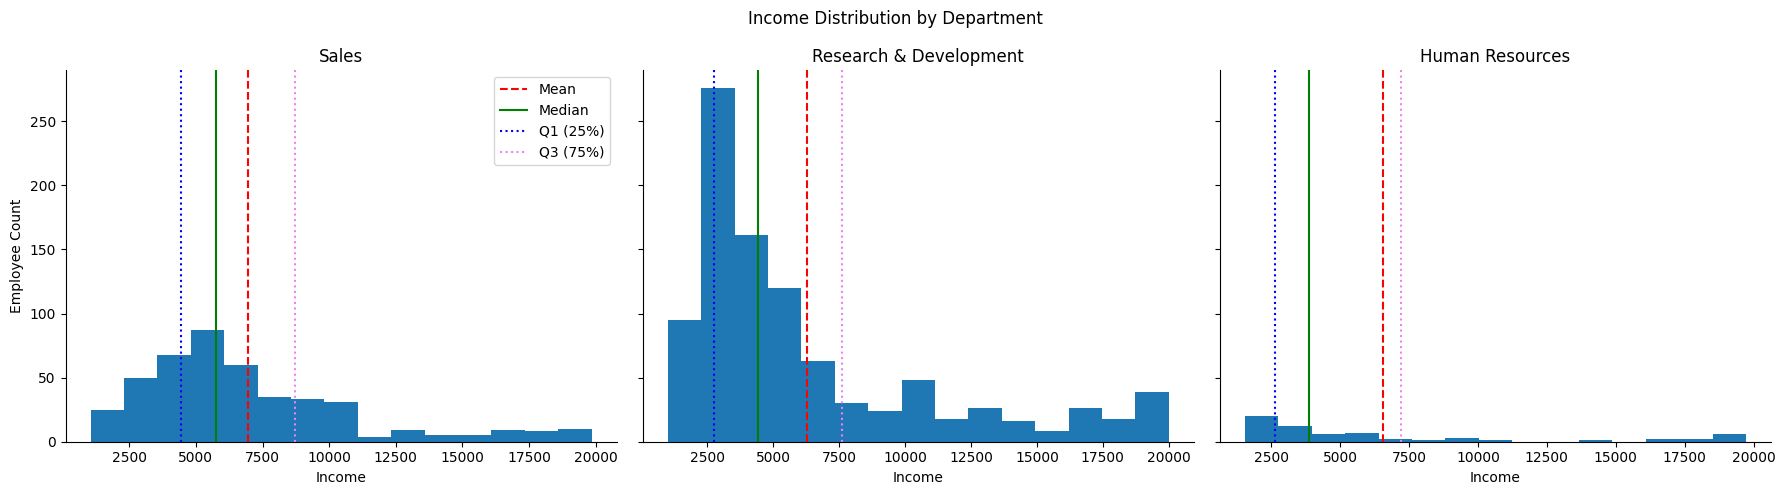

In [21]:
# DISTRIBUCIÓN DEL SALARIO POR DEPARTAMENTO:

departments = df["Department"].unique()

fig, axes = plt.subplots(1, len(departments), figsize=(18,5), sharey=True)

for i, dept in enumerate(departments):

    data = df[df["Department"] == dept]["MonthlyIncome"]

    # Histograma
    
    axes[i].hist(
    data,
    bins=15,
    )

    # Media y mediana
    mean_val = data.mean()
    median_val = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    axes[i].axvline(mean_val, linestyle="--", label="Mean", color = "red")
    axes[i].axvline(median_val, linestyle="-", label="Median", color = "green")
    axes[i].axvline(q1, color="blue", linestyle=":", label="Q1 (25%)")
    axes[i].axvline(q3, color="violet", linestyle=":", label="Q3 (75%)")

    axes[i].set_title(dept)
    axes[i].set_xlabel("Income")
        
axes[0].set_ylabel("Employee Count")
axes[0].legend()
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
plt.suptitle("Income Distribution by Department")
plt.tight_layout()
plt.show()

⬆️ Interpretación: Estos histogramas muestran la distribución del ingreso mensual de los empleados en los tres departamentos de la empresa.

Las líneas verticales representan estadísticas clave:
- Media (línea discontinua)
- Mediana (línea continua)
- Q1 y Q3 (líneas punteadas), que delimitan el rango intercuartílico (IQR)
El IQR contiene el 50% central de los salarios y permite medir la dispersión salarial dentro de cada departamento.


🔹Departamento de Sales (Ventas):
- En el departamento de Ventas, la distribución salarial está relativamente concentrada alrededor de la mediana.
- La media es ligeramente superior a la mediana, lo que sugiere la presencia de algunos empleados con salarios más altos.
El rango intercuartílico es relativamente estrecho, indicando que la mayoría de los empleados de Ventas gana dentro de un rango salarial similar.

            📌 Insight: Los salarios en Ventas son bastante homogéneos, con poca variabilidad interna.

🔹Departamento de Research & Development (I+D):
- El departamento de I+D presenta la distribución salarial más amplia.
- La diferencia entre Q1 y Q3 es mayor, lo que genera el IQR más elevado de todos los departamentos.
- Además, la media está claramente por encima de la mediana, lo que indica la existencia de salarios muy altos (outliers), probablemente asociados a perfiles técnicos senior o altamente especializados.

            📌 Insight: I+D muestra mayor desigualdad salarial, reflejando una mezcla de roles junior y expertos con sueldos elevados.

🔹Departamento de Human Resources (Recursos Humanos):
- Recursos Humanos muestra los niveles salariales más bajos en general.
- Tanto la mediana como los cuartiles están desplazados hacia valores de ingreso más reducidos.
- El IQR es relativamente pequeño, lo que significa que los salarios en este departamento son más uniformes y presentan menos valores extremos.

            📌 Insight: La compensación en RRHH parece más estandarizada, con poca dispersión salarial.


CONCLUSIÓN GLOBAL:

En conjunto, existen diferencias salariales importantes entre departamentos:
- I+D tiene mayor dispersión y salarios extremos más altos.
- Ventas presenta una distribución moderadamente concentrada
- RRHH muestra salarios más bajos y consistentes.

Estas diferencias pueden influir en la satisfacción y retención de empleados, especialmente en departamentos con mayor desigualdad o con salarios medianos más bajos.

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\4191206937.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


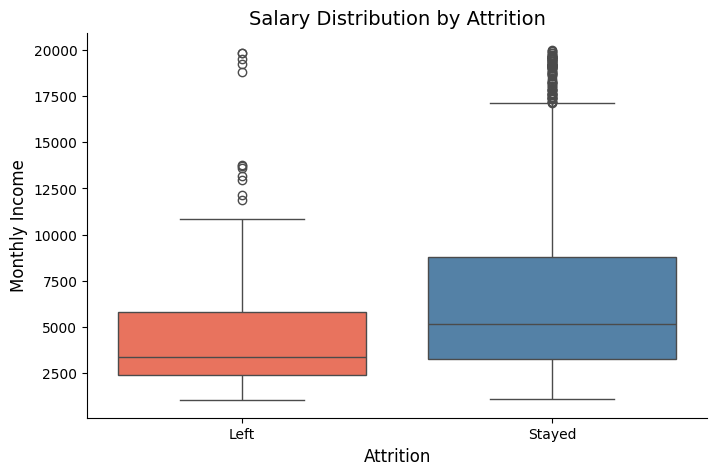

In [38]:
# DISTRIBUCIÓN DEL SALARIO MENSUAL Y ROTACIÓN:

labels_map = {0: "Stayed", 1: "Left"}
labels = df["Attrition"].map(labels_map)

plt.figure(figsize=(8,5))
sns.boxplot(
    data= df,
    x= labels,      # 0 = no se fue, 1 = se fue
    y='MonthlyIncome',
    palette ={"Left": 'tomato', "Stayed": 'steelblue' } 
)

plt.title('Salary Distribution by Attrition', fontsize=14)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False) 

plt.show()

⬆️ Interpretación: Este gráfico compara la distribución de ingresos entre quienes abandonaron (Left) y quienes se quedaron (Stayed) mostrando la mediana salarial y la dispersión, con presencia de outliers o valores atípicos.

La mediana salarial de “Stayed” es más alta que la de “Left”.
-  Los empleados que permanecen suelen tener mejores salarios.
- Los que abandonan están más concentrados en salarios bajos.

En cuanto a outliers: empleados con salario alto que se fueron → posiblemente motivaciones no económicas (carrera, managers, etc.)

Esto sugiere:
- El salario es un factor importante de retención.

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\979318733.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


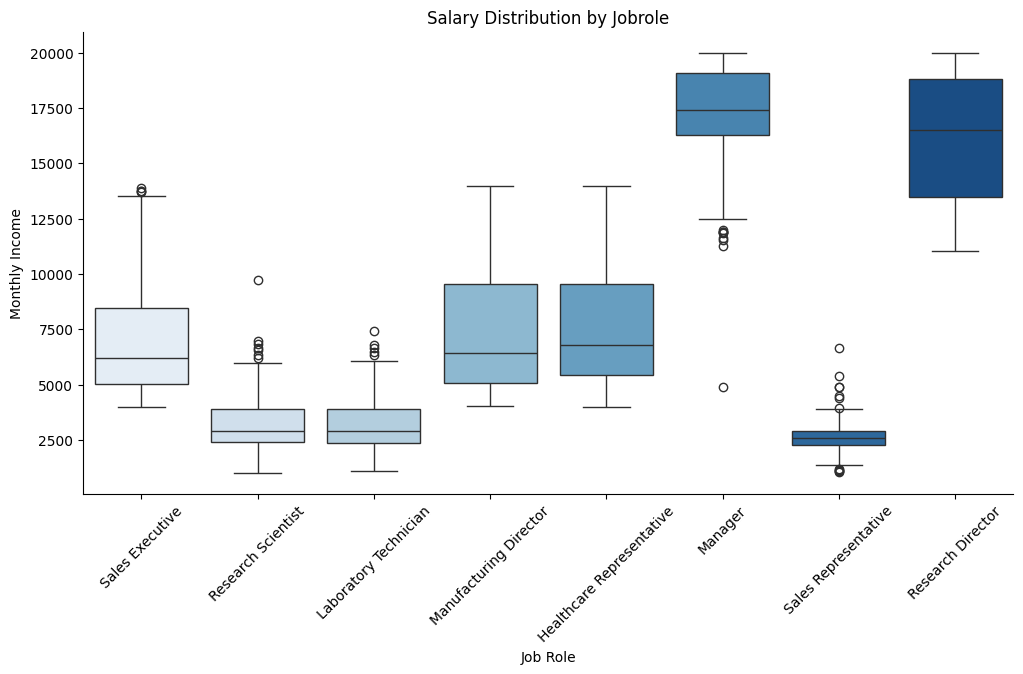

In [22]:
# DISTRIBUCIÓN DEL SALARIO EN LOS PUESTOS MÁS COMUNES (Boxplot):

# Seleccionar los 8 roles más comunes
top_roles = df["JobRole"].value_counts().head(8).index
df_top = df[df["JobRole"].isin(top_roles)]

plt.figure(figsize=(12,6))

sns.boxplot(
    data=df_top,
    x="JobRole",
    y="MonthlyIncome",
    palette="Blues"
)

plt.title("Salary Distribution by Jobrole")
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False) 

plt.show()

⬆️ Interpretación: Este boxplot muestra cómo varía el ingreso mensual dependiendo del puesto específico dentro de la empresa.

Cada caja representa:
- La mediana salarial del rol
- El rango intercuartílico (50% central)
- Posibles valores extremos (outliers)


🔹Roles técnicos y senior:
- Los puestos como Research Scientist o Manager suelen mostrar medianas más altas y mayor dispersión salarial. 

        📌 Esto refleja una combinación de perfiles junior y senior dentro del mismo rol.

🔹Roles administrativos o junior:
- Roles como Sales Representative o Human Resources presentan salarios más bajos y rangos más estrechos.

        📌 Esto indica una estructura salarial más homogénea.

🔹Outliers:
- La presencia de puntos fuera de la caja sugiere empleados con salarios significativamente superiores.

       📌 Estos casos suelen corresponder a posiciones de liderazgo o alta especialización.

⚠️ **RISK SCORE**

La variable Risk Score es una métrica construida a partir de distintos factores asociados a la rotación. Su objetivo es sintetizar en un único indicador el nivel de riesgo potencial de abandono de cada empleado.

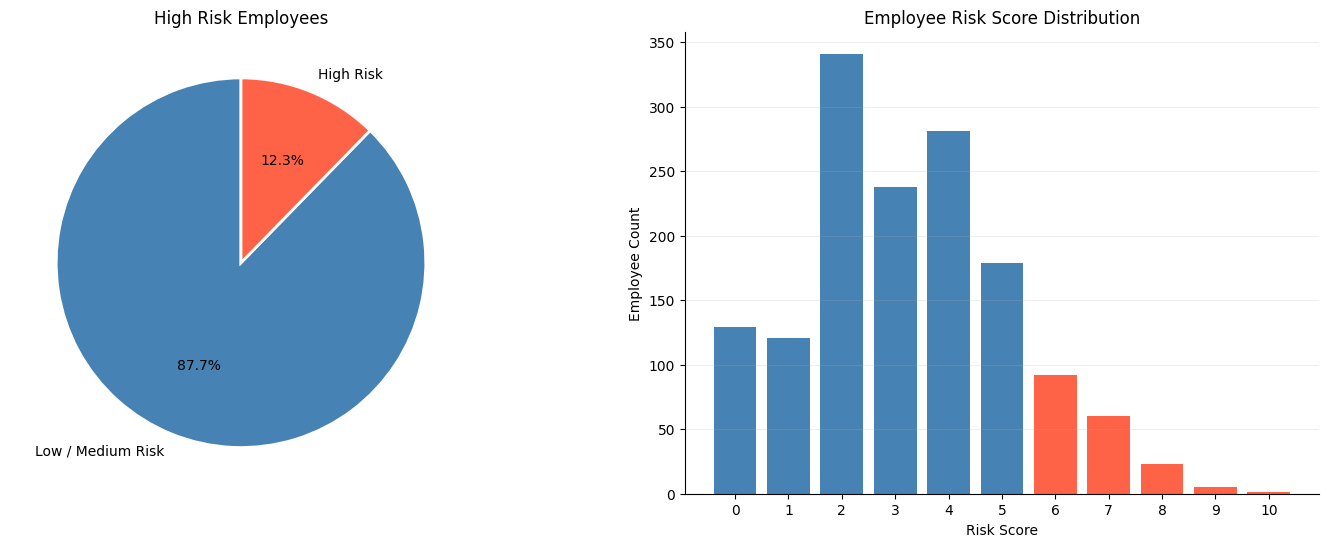

In [24]:
# DISTRIBUCIÓN DEL RISK SCORE CREADO: 
# Vamos a crear un SUBPLOT donde analizar el porcentaje de alto riesgo en la empresa y su distribución

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Creamos el pie chart:
risk_counts = (
    df.assign(HighRisk=df["RiskScore"] >= 6)
      .groupby("HighRisk")
      .size()
      .reindex([False, True])
)

ax1.pie(
    risk_counts,
    labels=["Low / Medium Risk", "High Risk"],
    autopct="%1.1f%%",
    startangle=90,
    colors=['steelblue', 'tomato'], wedgeprops={"edgecolor": "white", "linewidth": 2},
  
)

ax1.set_title("High Risk Employees")

# Definimos la gráfica de barras:
# Conteo por nivel (0..10)
risk_counts = (
    df["RiskScore"]
      .value_counts()
      .sort_index()
      .reindex(range(0, 11), fill_value=0)
)

# Colores: bajo/medio vs alto
colors = ["steelblue" if score < 6 else "tomato"
          for score in risk_counts.index]


ax2.bar(risk_counts.index, risk_counts.values, color=colors)
ax2.set_title("Employee Risk Score Distribution")
ax2.set_xlabel("Risk Score")
ax2.set_ylabel("Employee Count")
ax2.set_xticks(range(0, 11))
ax2.grid(axis="y", alpha=0.2)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.show()

⬆️ Interpretación: En el gráfico de la izquierda se puede observar que la mayoría de los empleados presenta niveles de riesgo bajo o medio; sin embargo, aproximadamente un 12% se encuentra en alto riesgo de abandono, lo que permite focalizar acciones preventivas en un grupo reducido pero relevante. El gráfico de la derecha muestra la distribución del Risk Score entre los empleados, permitiendo visualizar cómo se concentra el nivel de riesgo estimado de abandono. La mayor parte de la plantilla se sitúa en niveles bajos y medios, mientras que un porcentaje menor presenta puntuaciones elevadas, identificadas como niveles de mayor riesgo (en rojo)

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\2646394436.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


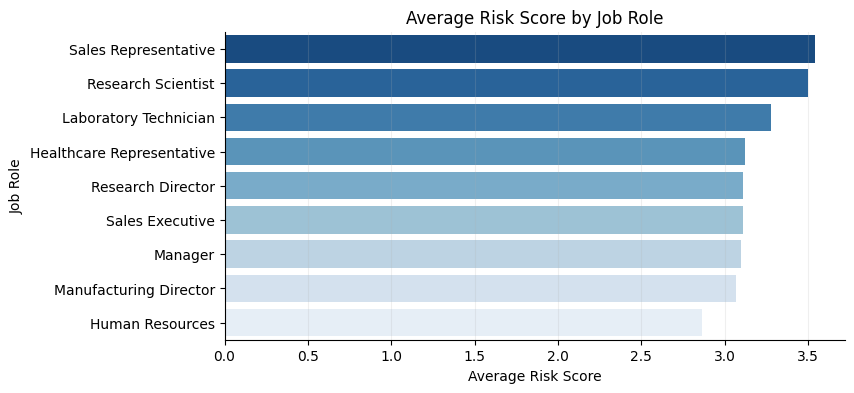

In [25]:
# RISK SCORE MEDIO POR PUESTO DE TRABAJO:

risk_jobrole = (
    df.groupby("JobRole")
      .agg(AvgRiskScore=("RiskScore", "mean"))
      .reset_index()
      .sort_values("AvgRiskScore", ascending=False)
)

plt.figure(figsize=(8,4))
sns.barplot(
    data=risk_jobrole,
    x="AvgRiskScore",
    y="JobRole",
    palette="Blues_r",
    errorbar=None
)

plt.title("Average Risk Score by Job Role")
plt.xlabel("Average Risk Score")
plt.ylabel("Job Role")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False) 
plt.grid(axis="x", alpha=0.2)

plt.show()


⬆️ Interpretación: El gráfico muestra diferencias en el RiskScore medio entre los distintos roles de la empresa. Los puestos de Sales Representative y Research Scientist presentan los valores medios más elevados, lo que indica un mayor riesgo estructural asociado a estos roles. En el extremo opuesto, Human Resources y Manufacturing Director muestran niveles de riesgo medio más bajos. Este resultado sugiere que el riesgo de abandono no se distribuye de forma homogénea entre roles y que ciertos perfiles requieren una atención prioritaria en estrategias de retención.

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\1949075324.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


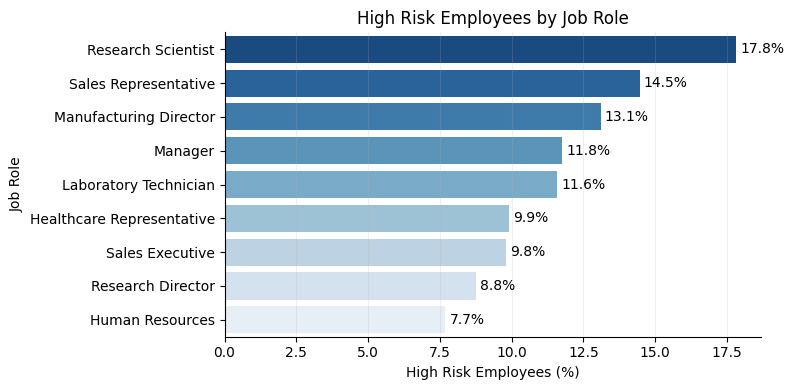

In [26]:
# PORCENTAJE DE ALTO RISK SCORE POR PUESTO:

high_risk_threshold = 6

high_risk_jobrole = (
    df.assign(HighRisk=df["RiskScore"] >= high_risk_threshold)
      .groupby("JobRole")
      .agg(HighRiskPercent=("HighRisk", "mean"))
      .reset_index())

high_risk_jobrole["HighRiskPercent"] *= 100

plt.figure(figsize=(8,4))

ax = sns.barplot(
    data=high_risk_jobrole,
    x="HighRiskPercent",
    y="JobRole",
    palette="Blues_r",
    errorbar=None,
    order=high_risk_jobrole
            .sort_values("HighRiskPercent", ascending=False)["JobRole"])

plt.title("High Risk Employees by Job Role")
plt.xlabel("High Risk Employees (%)")
plt.ylabel("Job Role")

for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f%%",
        label_type="edge",
        padding=3)

plt.tight_layout()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False) 
plt.grid(axis="x", alpha=0.2)
plt.show()



⬆️ Interpretación: El gráfico muestra el porcentaje de empleados en alto riesgo de abandono por rol, lo que permite identificar perfiles críticos más allá del riesgo medio. Research Scientist y Sales Representative concentran la mayor proporción de empleados en alto riesgo, mientras que Human Resources y Research Director presentan los valores más bajos. Este análisis complementa el RiskScore medio por rol, mostrando que algunos puestos, aunque no tengan el mayor riesgo promedio, concentran un número relevante de casos de riesgo elevado y deben ser priorizados en acciones preventivas.

C:\Users\ANUSK\AppData\Local\Temp\ipykernel_9528\1774505465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


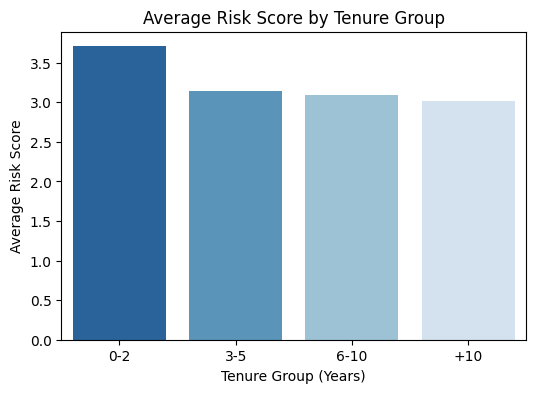

In [32]:
# RISK SCORE MEDIO POR GRUPO DE ANTIGÜEDAD:

risk_tenure = (
    df.groupby("TenureGroup")
      .agg(AvgRiskScore=("RiskScore", "mean"))
      .reset_index()
)

tenure_order = ["0-2", "3-5", "6-10", "+10"]

risk_tenure["TenureGroup"] = pd.Categorical(
    risk_tenure["TenureGroup"],
    categories=tenure_order,
    ordered=True
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=risk_tenure,
    x="TenureGroup",
    y="AvgRiskScore",
    palette="Blues_r",
   )

plt.title("Average Risk Score by Tenure Group")
plt.xlabel("Tenure Group (Years)")
plt.ylabel("Average Risk Score")
plt.show()


⬆️ Interpretación: El RiskScore medio es más elevado en los empleados con menor antigüedad en la empresa y disminuye progresivamente a medida que aumenta el tiempo de permanencia. El grupo de 0–2 años presenta el mayor nivel de riesgo medio, lo que indica que los primeros años en la empresa constituyen el periodo más crítico en términos de probabilidad de abandono. Este resultado refuerza la importancia de implementar acciones preventivas tempranas durante las fases iniciales del ciclo del empleado.

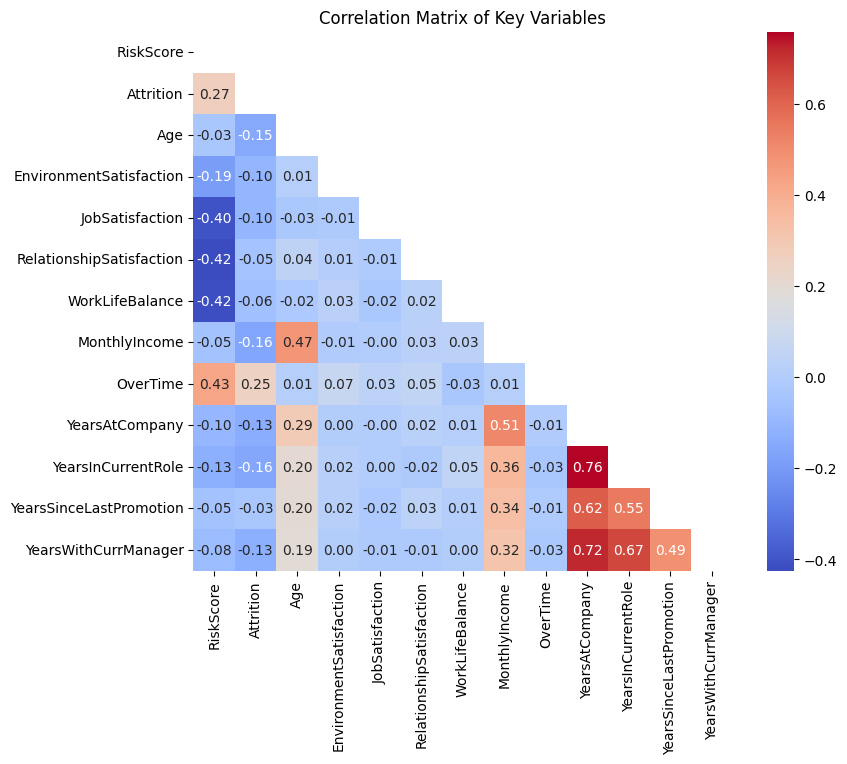

In [29]:
# MATRIZ DE CORRELACIÓN DE VARIABLES CLAVE Y RISK SCORE:

corr_vars = ['RiskScore', 'Attrition', 'Age',
       'EnvironmentSatisfaction',
        'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance',
       'MonthlyIncome', 'OverTime',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

mask = np.triu(np.ones_like(corr_vars, dtype=bool))

corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(9,7))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    mask=mask
)

plt.title("Correlation Matrix of Key Variables")
plt.show()


⬆️ Interpretación: El mapa de correlación muestra que la rotación presenta relaciones débiles a moderadas con distintas variables, lo que confirma que el abandono no responde a un único factor. La correlación positiva entre Attrition y RiskScore (0.27) indica que el RiskScore captura parte del riesgo de salida, aunque no de forma determinista, lo que es coherente con la naturaleza multicausal del fenómeno. En conjunto, el heatmap refuerza la necesidad de un enfoque multivariable para el análisis del abandono.